In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

def rough_plot(in_list, num_group):
    rough_list = list()
    tmp_sum = 0
    
    for i in range(1, len(in_list)):
        tmp_sum += in_list[i]
    
        if(i%num_group == num_group-1):
            rough_list.append(tmp_sum / num_group)
            tmp_sum = 0
            
    plt.plot(rough_list)

In [3]:
import math
from fractions import Fraction

class StockQLData:
    'Result data of approximated q-learning of stock price'
    
    def __init__(self, action_level, data_len, ratio_num_local, trial_range):
        self.last_reward = list()
        
        self.last_w = list()
        
        self.rwd_sum = 0
        self.avg_point_rwd = list()

        self.act_num = np.zeros(action_level*2 + 1)
        self.act_num_list = list()

        self.ratio_local_size = math.floor(data_len/ratio_num_local)
        self.tmp_local_act_num = np.zeros(action_level*2 + 1)
        self.tmp_trial_act_ratio = list()
        self.act_ratio = list() # all_trial_act_ratio
        
        self.trial_range = trial_range # for the default argumant of print_local_act_ratio
        
    def point_update_action_num(self, last_act):
        self.act_num[last_act] += 1

    
    def point_update_rwd_sum(self, state, last_state, avg_point_rwd_func):
        self.rwd_sum += avg_point_rwd_func(state, last_state) 
        
    def point_update_action_ratio(self, last_act, data_index):        
        self.tmp_local_act_num[last_act] += 1
        if (data_index+1) % self.ratio_local_size == 0:
            self.tmp_trial_act_ratio.append(self.tmp_local_act_num/self.tmp_local_act_num.sum())
            self.tmp_local_act_num.fill(0)
            
        
    def last_point(self, trial_length, state, init_invest, w, last_rwd_func):
        self.avg_point_rwd.append(self.rwd_sum/(trial_length-1)) #ignore the first reward(=0)
        self.rwd_sum = 0
        
        self.last_reward.append(last_rwd_func(state, init_invest))
        
        cp_w = w.copy()
        self.last_w.append(cp_w)

        tmp_act_num = self.act_num.copy()
        self.act_num_list.append(tmp_act_num)
        self.act_num.fill(0)
        
        if np.count_nonzero(self.tmp_local_act_num) > 0:
            self.tmp_trial_act_ratio.append(self.tmp_local_act_num/self.tmp_local_act_num.sum())
            self.tmp_local_act_num.fill(0)
        self.act_ratio.append(self.tmp_trial_act_ratio.copy())
        del self.tmp_trial_act_ratio[:] # empty the list

        
    def __act_ratio_prepare_print(self, start, end, alcnum, action_level): # the start/end trial index(can not recognize in the plot, just where data come from), actual number of local(i.e. group)
        ret = list()
        
        # initialize
        for i in range(0, alcnum):  # alcnum
            ret.append(np.zeros(action_level*2 + 1))
            
        trind = start
        lcind = 0
        for trind in range(start, end+1):
            for lcind in range(0, alcnum):
                for actind in range(0, action_level*2 + 1):
                    ret[lcind][actind] += sqld.act_ratio[trind][lcind][actind] / (end - start + 1)
        return ret

        
    # print the series with local rate ratio
    def print_local_act_ratio(self, data, action_level, start_trind=0, end_trind=None):
        if end_trind is None:
            end_trind = trial_range - 1
        
        alcnum = len(sqld.act_ratio[0]) # actual number of local(i.e. group)
        
        to_plot = self.__act_ratio_prepare_print(start_trind, end_trind, alcnum, action_level)
        
        sf, saxarr = plt.subplots(alcnum, 2, figsize=(9, 4*alcnum)) # print all local by now
        
        row_count = 0
        
        pie_labels = ["hold"]
        for i in range(1, action_level+1):
            pie_labels.append("{0} buy".format(Fraction(i, action_level)))
        for i in range(1, action_level+1):
            pie_labels.append("{0} sell".format(Fraction(i, action_level)))
            
        for lcind in range(0, alcnum): # print all local by now
            tmp_data = data.copy()
            tmp_data = tmp_data[sqld.ratio_local_size*lcind : sqld.ratio_local_size*(lcind + 1)]
            
            saxarr[row_count, 0].plot(tmp_data)
            saxarr[row_count, 0].set_title('close_price')
            
            saxarr[row_count, 1].pie(to_plot[lcind], labels=pie_labels)
            saxarr[row_count, 1].set_title('act_ratio')
            
            
            row_count += 1
        

##### lists of data in each folder: copy and paste into the cell below
* ./input/  
inputFolderFormat = "./input/{0}"
inputCsvList = ['QCOM.csv', 'GOOG.csv', 'NOK.csv', '^DJI.csv', '^TWII.csv', 
           '^N225.csv', '^GDAXI.csv', '^IXIC.csv', '^KS11.csv', '^SSEC.csv', 
           'NSU.DE_10_5_5.csv', 'DAI.DE_10_5_5.csv', 'BMW.DE_10_5_5.csv', 
           '0050.TW.csv', '1216.TW.csv', '1301.TW.csv', '2002.TW.csv', 
           '2330.TW.csv', '2409.TW.csv', '2454.TW.csv', '1704.TW.csv']

* ./input/2001_2010/  
inputFolderFormat = "./input/2001_2010/{0}"
inputCsvList = ['QCOM.csv', 'NOK.csv', '^DJI.csv', '^TWII.csv', 
            '^N225.csv', '^GDAXI.csv', '^IXIC.csv', '^KS11.csv', 
            '^SSEC.csv', 'NSU.DE.csv', 'DAI.DE.csv', 'BMW.DE.csv']  
            
* ./input/fall/  
inputFolderFormat = "./input/fall/{0}"  
inputCsvList = ['1314.TW.csv', '2323.TW.csv', '2349.TW.csv', 
'2353.TW.csv', '2405.TW.csv', '2409.TW.csv', '2601.TW.csv', 
'2885.TW.csv', '2888.TW.csv', '6116.TW.csv']         

In [4]:
inputFolderFormat = "./input/fall/{0}"  
inputCsvList = ['1314.TW.csv', '2323.TW.csv', '2349.TW.csv', 
'2353.TW.csv', '2405.TW.csv', '2409.TW.csv', '2601.TW.csv', 
'2885.TW.csv', '2888.TW.csv', '6116.TW.csv'] 
#inputCsvList = ['QCOM.csv']


full_action = True  # if True: buy with all cash, sell all stock
init_invest = 10000
trial_range = 1
consrange = 20     # consecutive days max. in the prob conslist

conslist = list()
for i in range(0, consrange*2 + 1):
    conslist.append([0, 0])

allrwdlist = list() 
    
for resource_data in inputCsvList:
    
    for i in range(0, consrange*2 + 1):
        conslist[i][0] = 0
        conslist[i][1] = 0
    
    input_csv = inputFolderFormat.format(resource_data)
    data = pd.read_csv(input_csv)
    close = data['Close']
    close = close.fillna(method='ffill')
    close = close.tolist()
    np.isnan(close).any()
    
    rwdlist = list()
    
    for trial in range(0, trial_range):

        state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest}
        
        cn = 0 # consecutive day num

        for point in range(0, len(close)):
            
            state['StockPrice'] = close[point]
            
            if point == 0:
                cn = 1 # serve as stok price going up
            elif 1 <= cn <= consrange: # consequtive goes up
                if close[point] >= close[point - 1]:
                    conslist[cn][0] += 1
                    cn += 1
                else:
                    conslist[cn][1] += 1
                    cn = consrange + 1
            elif consrange+1 <= cn <= consrange*2: # consequtive goes down
                if close[point] < close[point - 1]:
                    conslist[cn][1] += 1
                    cn += 1
                else:
                    conslist[cn][0] += 1
                    cn = 1
            
            tmp = cn
            
            # ar: action ratio
            while(1):          
                if conslist[tmp][0] + conslist[tmp][1] > 0:
                    ar = conslist[tmp][0] / (conslist[tmp][0] + conslist[tmp][1]) # ar: prob of next price going up
                    break
                else:
                    tmp -= 1
                    if tmp == 0 or tmp == consrange:
                        ar = 0.5
                        break
                    
            if ar >= 0.5: # next price may go up, let's buy
                ar = (ar - 0.5)*2
                
                if full_action:
                    state['NumStock'] += state['HandCash'] / state['StockPrice']
                    state['HandCash'] = 0
                else:
                    state['NumStock'] += state['HandCash'] * ar / state['StockPrice']
                    state['HandCash'] *= 1 - ar
                
                
                
            else: # next price may go down, let's sell
                ar = 1 - ar # ar: prob of next price going down
                ar = (ar - 0.5)*2
                
                if full_action:
                    state['HandCash'] += state['NumStock'] * state['StockPrice']
                    state['NumStock'] = 0
                else:
                    state['HandCash'] += state['NumStock'] * ar * state['StockPrice']
                    state['NumStock'] *= 1 - ar
                
            rwdlist.append(state['HandCash'] + state['StockPrice']*state['NumStock'] - 10000)
        allrwdlist.append(rwdlist)
                
            #print(state)
            #print(point, ' :: ', conslist[1:15], '*****', conslist[consrange+1: consrange+15])
    print(resource_data, state['HandCash'] + state['StockPrice']*state['NumStock'] - 10000)
    #print(resource_data, state['HandCash'] + state['StockPrice']*state['NumStock'])
    #print(point, ' :: ', conslist[1:6], '*****', conslist[consrange+1: consrange+6])

    #rough_plot(sqld.last_reward, 2)

1314.TW.csv -7261.28238022515
2323.TW.csv 929.7102948997326
2349.TW.csv -7445.298085681234
2353.TW.csv -2762.8810882460466
2405.TW.csv 4321.079438013352
2409.TW.csv -5158.939349968193
2601.TW.csv -5210.513190563879
2885.TW.csv -2064.51428745023
2888.TW.csv -4528.464370622936
6116.TW.csv -6162.044441504473


#### conslist explanation
* **conslist[1] = [605, 332] ----> stock rose (one day in a row) include today**, in our previous experience, there were 605 days the tomorrow price raise, 332 days the tomorrow price fall
* conslist[2] ----> stock rose two days in a row include today
* ...
* conslist[consrange] ----> stock rose {consrange} days in a row include today
* conslist[consrange + 1] ----> stock fell (one day in a row) include today
* conslist[consrange + 2] ----> stock fell two days in a row include today
* ...
* conslist[consrange*2] ----> stock fell {consrange} days in a row include today
* **conslist[3] = [605, 332] ----> stock rose 3 days in a row include today. In our previous experience, there were 605 days the tomorrow price raise, 332 days the tomorrow price fall in the same situation(i.e. rose 3 days in a row).**

In [5]:
state

{'HandCash': 0, 'NumStock': 318.16456863211914, 'StockPrice': 12.0628}

In [6]:
#conslist

In [7]:
resource_data

'6116.TW.csv'

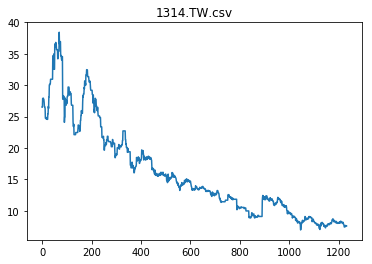

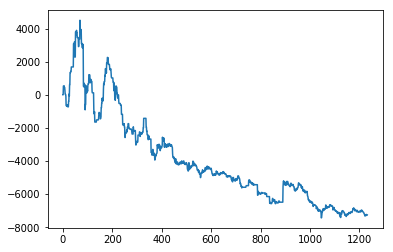

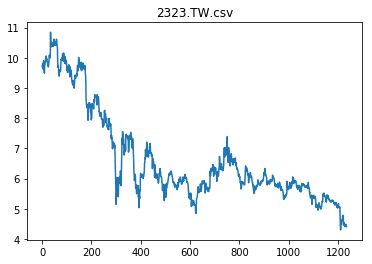

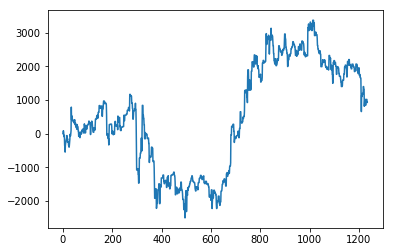

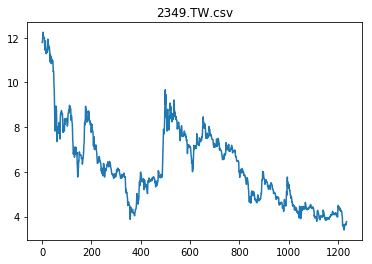

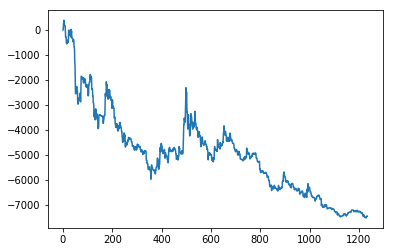

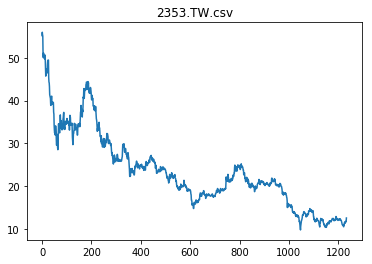

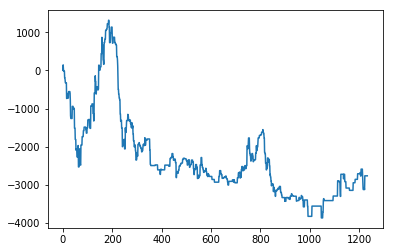

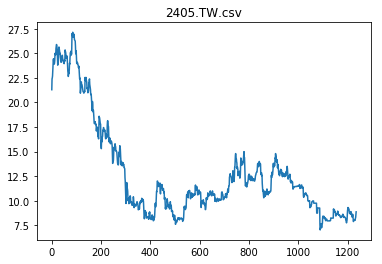

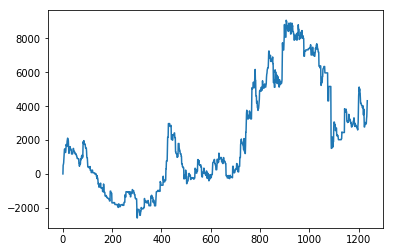

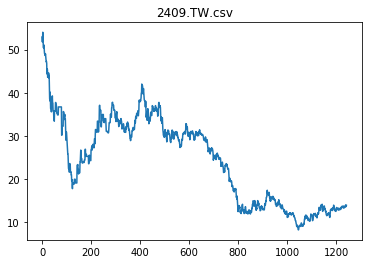

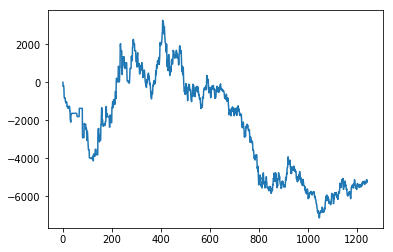

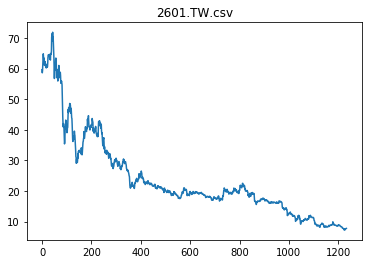

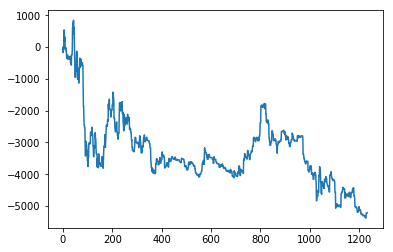

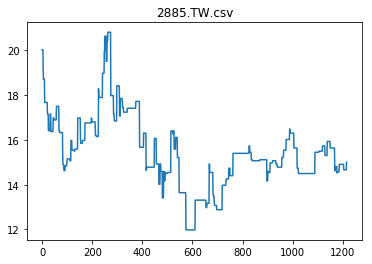

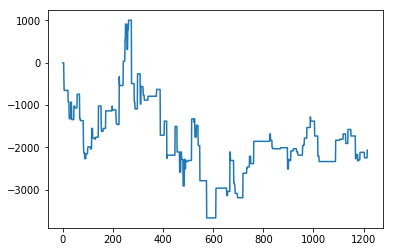

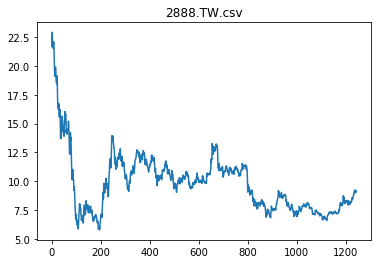

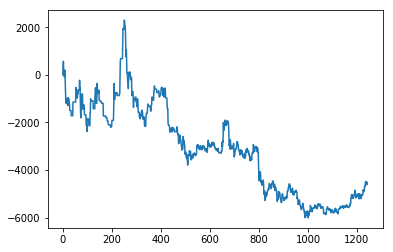

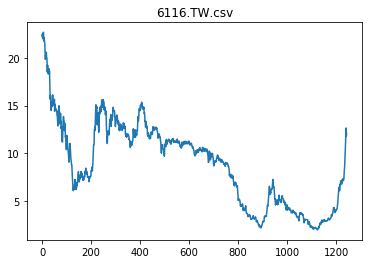

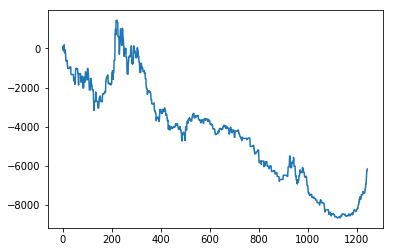

In [8]:
for i in range(0, len(inputCsvList)):
    input_csv = inputFolderFormat.format(inputCsvList[i])
    data = pd.read_csv(input_csv)
    close = data['Close']
    close = close.fillna(method='ffill')
    close = close.tolist()
    plt.title(inputCsvList[i])
    plt.plot(close)
    plt.show()
    plt.plot(allrwdlist[i])
    plt.show()

In [9]:
allrwdlist[2]

[0.0,
 12.556312516438993,
 163.1472227642571,
 288.625507979199,
 388.9911681612648,
 225.84394539700952,
 225.84394539700952,
 175.70353528069427,
 175.70353528069427,
 163.1472227642571,
 -25.112625032874348,
 -288.54066802976195,
 -288.54066802976195,
 -288.54066802976195,
 -506.49971617707706,
 -554.9714504006715,
 -554.9714504006715,
 -480.72768861644,
 -431.17604602764004,
 -517.8077184590729,
 -406.40022473323916,
 -480.72768861644,
 -468.33977796923864,
 -10.321892418709467,
 -10.321892418709467,
 -10.321892418709467,
 -60.74813979407554,
 -199.33514060441303,
 -199.33514060441303,
 -123.69576954136573,
 -123.69576954136573,
 -276.363124915777,
 -276.363124915777,
 26.631900116854013,
 -118.31749880349162,
 -39.20559576645064,
 -250.08158055099557,
 -342.2897107799781,
 -342.2897107799781,
 -342.2897107799781,
 -342.2897107799781,
 -471.75714411684385,
 -394.11169897161017,
 -394.11169897161017,
 -394.11169897161017,
 -670.4697269909339,
 -670.4697269909339,
 -775.432487932159